# Network Analysis with Python

From online social networks such as Facebook and Twitter to transportation networks such as bike sharing systems, networks are everywhere—and knowing how to analyze them will open up a new world of possibilities for you as a data scientist. This notebook will equip you with the skills to analyze, visualize, and make sense of networks. You'll apply the concepts you learn to real-world network data using the powerful NetworkX library.

## What is a network?

Let's think again about examples of networks. Which of the following data is least easily modeled as a network?

- Airplane transportation.
- Phone numbers in a telephone directory. (correct)
- Co-authorship of papers.
- Atoms in a molecule.

Compared to the other options, it would not be as easy to model phone numbers in a telephone directory as a network.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx

path = 'data/dc23/'

## Basics of NetworkX API, using Twitter network

To get you up and running with the `NetworkX` API, we will run through some basic functions that let you query a `Twitter` network that has been pre-loaded for you and is available as `T`. The Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the `NetworkX` API to explore some basic properties of the network, and are encouraged to experiment with the data.

Wait for the IPython shell to indicate that the graph that has been preloaded under the variable name T (representing a Twitter network), and then answer the following question:

What is the size of the graph `T`, the type of `T.nodes()`, and the data structure of the third element of the last edge listed in `T.edges(data=True)`? The `len()` and `type()` functions will be useful here. To access the last entry of `T.edges(data=True)`, you can use `list(T.edges(data=True))[-1]`.

In [14]:
G = nx.Graph()

In [15]:
G.add_nodes_from([1, 2, 3])

In [16]:
G.nodes()

NodeView((1, 2, 3))

In [21]:
len(G.nodes)

3

In [22]:
list(G.nodes())[:2]

[1, 2]

In [17]:
G.add_edge(1, 2)

In [18]:
G.edges()

EdgeView([(1, 2)])

In [19]:
G.node[1]['label'] = 'blue'
G.nodes(data=True) 

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

/Users/ksatola/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


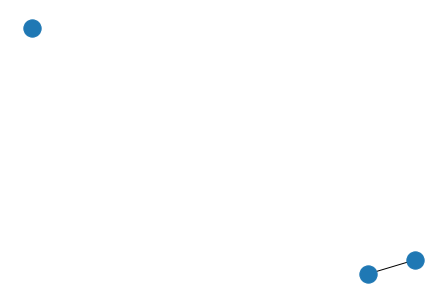

In [20]:
nx.draw(G)
plt.show();

In [26]:
nx.write_gpickle(G, path+'G.p')

In [27]:
G1 = nx.read_gpickle(path+'G.p')

In [28]:
G1.nodes()

NodeView((1, 2, 3))

## Queries on a graph

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for `"nodes of interest"` and `"edges of interest"`. To achieve this, you'll make use of the `.nodes()` and `.edges()` methods. The `.nodes()` method returns a list of nodes, while the `.edges()` method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument `data=True` in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. Here's the recipe for a list comprehension: `[ output expression for iterator variable in iterable if predicate expression ]`.

You have to fill in the `_iterable_` and the `_predicate expression_`.

- Use a list comprehension to get a list of nodes from the graph `T` that have the 'occupation' label of 'scientist'. The output expression `n` has been specified for you, along with the iterator variables `n` and `d`. Your task is to fill in the iterable and the conditional expression. Use the `.nodes()` method of `T` access its nodes, and be sure to specify `data=True` to obtain the metadata for the nodes. The iterator variable `d` is a dictionary. The key of interest here is 'occupation' and value of interest is 'scientist'.

In [64]:
T = nx.read_gpickle(path+'ego-twitter.p')

In [65]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
noi[:10]

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]

- Use a list comprehension to get a list of edges from the graph `T` that were formed for at least 6 years, i.e., from before 1 Jan 2010. Your task once again is to fill in the iterable and conditional expression. Use the `.edges()` method of `T` to access its edges. Be sure to obtain the metadata for the edges as well. The dates are stored as `datetime.date` objects in the metadata dictionary d, under the key 'date'. To access the date 1 Jan 2009, for example, the dictionary value would be date(2009, 1, 1).

In [66]:
import datetime as dt

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < dt.date(2010, 1, 1)]
eoi[:10]

[(1, 5),
 (1, 9),
 (1, 13),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 24),
 (1, 27)]

## Types of Graphs

<img src="images/graphs01.png" alt="" style="width: 400px;"/>

<img src="images/graphs02.png" alt="" style="width: 400px;"/>

<img src="images/graphs03.png" alt="" style="width: 400px;"/>


In [67]:
# Undirected Graph
G = nx.Graph()
type(G)

networkx.classes.graph.Graph

In [68]:
# Directed Graph
G = nx.DiGraph()
type(G)

networkx.classes.digraph.DiGraph

In [69]:
# Multi Graph
G = nx.MultiGraph()
type(G)

networkx.classes.multigraph.MultiGraph

In [70]:
# Multi Directed Graph
G = nx.MultiDiGraph()
type(G)

networkx.classes.multidigraph.MultiDiGraph

## Checking the un/directed status of a graph

Which type of graph do you think the Twitter network data you have been working with corresponds to? Use Python's built-in type() function in the IPython Shell to find out. The network, as before, has been pre-loaded as T.

Of the four below choices below, which one corresponds to the type of graph that T is?

In [71]:
type(T)

networkx.classes.digraph.DiGraph

## Specifying a weight on edges

`Weights can be added to edges in a graph`, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the `'weight'` key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands `T.edges[1, 10]` and then `T.edges[10, 1]`. Note how there's only one field, and now you're going to add another field, called `'weight'`.

In [72]:
T.edges[1, 10]

{'date': datetime.date(2012, 9, 8)}

In [73]:
# There is no edge between nodes 10 and 1
T.edges[10, 1]

KeyError: 1

- Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2. Refer to the following template to set an attribute of an edge: `network_name.edges[node1, node2]['attribute'] = value`. Here, the 'attribute' is 'weight'.
- Set the weight of every edge involving node 293 to be equal to 1.1. To do this:
    - Using a for loop, iterate over all the edges of T, including the metadata.
    - If 293 is involved in the list of nodes `[u, v]`:
        - Set the weight of the edge between `u` and `v` to be 1.1.

In [76]:
# Set the weight of the edge between nodes 1 and 10
T[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):
    
    # Check if node 3 is involved
    if 3 in [u, v]:

        # Set the weight to 1.1
        T[u][v]['weight'] = 1.1
        
    # Print only a subset
    if u < 15 and v < 15: 
        print('edge between {} and {} with labels {}'.format(u, v, d))

edge between 1 and 3 with labels {'date': datetime.date(2012, 11, 16), 'weight': 1.1}
edge between 1 and 4 with labels {'date': datetime.date(2013, 6, 7)}
edge between 1 and 5 with labels {'date': datetime.date(2009, 7, 27)}
edge between 1 and 6 with labels {'date': datetime.date(2014, 12, 18)}
edge between 1 and 7 with labels {'date': datetime.date(2010, 10, 18)}
edge between 1 and 8 with labels {'date': datetime.date(2012, 4, 18)}
edge between 1 and 9 with labels {'date': datetime.date(2007, 10, 14)}
edge between 1 and 10 with labels {'date': datetime.date(2012, 9, 8), 'weight': 2}
edge between 1 and 11 with labels {'date': datetime.date(2010, 1, 6)}
edge between 1 and 12 with labels {'date': datetime.date(2012, 12, 27)}
edge between 1 and 13 with labels {'date': datetime.date(2008, 12, 18)}
edge between 1 and 14 with labels {'date': datetime.date(2014, 5, 25)}


## Checking whether there are self-loops in the graph

`NetworkX` also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops()`.

In this exercise as well as later ones, you'll find the **assert statement** useful. An assertions check whether the statement placed after it evaluates to True, otherwise it will throw an `AssertionError`.

To begin, use the `.number_of_selfloops()` method on `T ` to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

In [77]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

In [79]:
len(find_selfloop_nodes(T))

42

There are 42 nodes in T that have self-loops.

## Network Visualization

<img src="images/graphs04.png" alt="" style="width: 400px;"/>

<img src="images/graphs05.png" alt="" style="width: 400px;"/>

<img src="images/graphs06.png" alt="" style="width: 400px;"/>

<img src="images/graphs07.png" alt="" style="width: 400px;"/>


## 